In [1]:
import numpy as np
import math 
from sympy.solvers import solve
import sympy as sm
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
import random
pi,hbar = sm.pi,1.054571817*10**(-34)
colorSeed = random.randint(3,8)
plt.style.use('bmh')

In [2]:
#Ex 1.
#The wavefunctions in terms of position
x,L = sm.symbols('x L',positive=True)
k,n = sm.Symbol('k'), sm.Symbol('n',positive=True,integer=True)
psi = sm.sin(n*pi*x/L)*(sm.sqrt(2/L))

In [3]:
psi

sqrt(2)*sin(pi*n*x/L)/sqrt(L)

In [4]:
#To find the momentum representation we take a fourier transform. I m gonna do it in terms of k, as
#either wise the p*x/hbar term produces problems
phi = sm.integrate(psi*sm.exp(-sm.I*k*x),(x,0,L),conds='none')*(1/sm.sqrt(2*pi))

In [5]:
phi

sqrt(2)*((-1)**n*sqrt(2)*pi*sqrt(L)*n/(L**2*k**2*exp(I*L*k) - pi**2*n**2*exp(I*L*k)) - sqrt(2)*pi*sqrt(L)*n/(L**2*k**2 - pi**2*n**2))/(2*sqrt(pi))

In [6]:
#Now to find the uncertainties
#Position
part1 = sm.integrate(psi**2*x,(x,0,L))
part2 = sm.integrate(psi**2*x**2,(x,0,L))
DeltaX = sm.simplify(sm.sqrt(part2-part1**2))
DeltaX

L*sqrt(3*pi**2*n**2 - 18)/(6*pi*n)

In [7]:
#Momentum
#part1 = sm.integrate(phi**2*k,(k,-sm.oo,sm.oo)) doing it in momentum space is impossible so 
#lets go back to position space
#the representation of k in position space is: k=-i*d/dx
part1 = sm.integrate(-psi*sm.I*sm.diff(psi,x),(x,0,L))
part2 = sm.integrate(-psi*sm.diff(psi,x,x),(x,0,L))
DeltaK = sm.sqrt(part2-part1**2)
DeltaK #The difference between that and DeltaP is a factor of hbar, that will not be needed for the
#rest of the exercise

pi*n/L

In [8]:
DeltaTotal = DeltaX*DeltaK
DeltaTotal

sqrt(3*pi**2*n**2 - 18)/6

In [9]:
def fitFunc(x,a,b,c):
    return a+b*x+c*x**2
integersArray = np.arange(1,21,1)
DeltaXArray = np.array([DeltaX.subs({n:i,L:1}).evalf() for i in integersArray])
DeltaKArray = np.array([DeltaK.subs({n:i,L:1}).evalf() for i in integersArray])
DeltaTotalArray = np.array([DeltaTotal.subs({n:i}).evalf() for i in integersArray])

In [10]:

deltaXparams = curve_fit(fitFunc,integersArray,DeltaXArray)
deltaKparams = curve_fit(fitFunc,integersArray,DeltaKArray)
deltaTotalparams = curve_fit(fitFunc,integersArray,DeltaTotalArray)

C:\Users\grega\AppData\Local\Temp\ipykernel_20312\128097585.py:2: OptimizeWarning: Covariance of the parameters could not be estimated
  deltaKparams = curve_fit(fitFunc,integersArray,DeltaKArray)


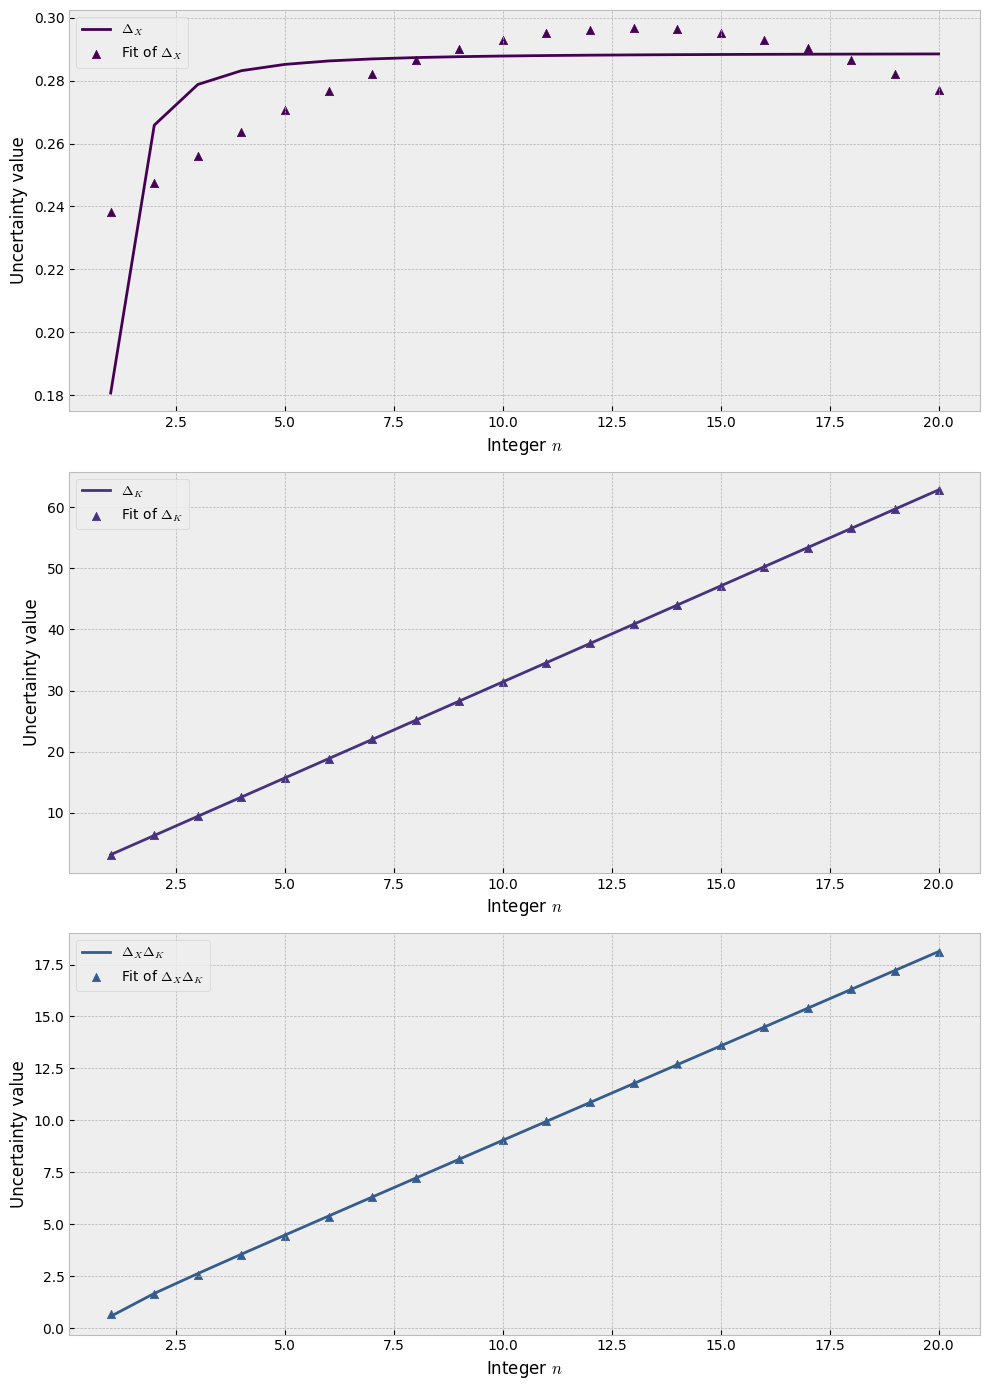

In [11]:
figs,axs = plt.subplots(3,1,figsize=(10,14))
colorMap = plt.get_cmap('viridis', colorSeed)

color = colorMap(0)
axs[0].plot(integersArray,DeltaXArray,label=r'$\Delta_X$',color=color)
axs[0].scatter(integersArray,fitFunc(integersArray,*deltaXparams[0]),label=r'Fit of $\Delta_X$',color=color,marker='^')
axs[0].set_xlabel(r"Integer $n$")
axs[0].set_ylabel(r'Uncertainty value')
axs[0].legend()

color=colorMap(1)
axs[1].plot(integersArray,DeltaKArray,label=r'$\Delta_K$',color=color)
axs[1].scatter(integersArray,fitFunc(integersArray,*deltaKparams[0]),label=r'Fit of $\Delta_K$',color=color,marker='^')
axs[1].set_xlabel(r"Integer $n$")
axs[1].set_ylabel(r'Uncertainty value')
axs[1].legend()

color=colorMap(2)
axs[2].plot(integersArray,DeltaTotalArray,label=r'$\Delta_X \Delta_K$',color=color)
axs[2].scatter(integersArray,fitFunc(integersArray,*deltaTotalparams[0]),label=r'Fit of $\Delta_X \Delta_K$',color=color,marker='^')
axs[2].set_xlabel(r"Integer $n$")
axs[2].set_ylabel(r'Uncertainty value')
axs[2].legend()
plt.tight_layout()
plt.show()

In [12]:
#Ex 2. #I m gonna keep m and L as variable and not set them to 1. hbar is gonna be unity in accordance
#with theoretical physics standards
N,m= sm.symbols('N m',positive=True)
psi1 = N*x*(L-x)
integral = sm.integrate(psi1**2,(x,0,L)) #The integral inside the well
NSolution = solve(sm.Eq(integral,1),N)[0] #Finding N such that psi1*psi1 = 1. We are keeping the positive solution
psi1Norm = psi1.subs({N:NSolution})
psi1Norm

sqrt(30)*x*(L - x)/L**(5/2)

In [13]:
#Lets make a check 
print(sm.integrate(psi1Norm**2,(x,0,L))) #This returns 1 so we did the normalization correctly

1


In [14]:
#The hamiltonian of the system is: H = - d^2/(2*m*dx^2), so to find the average energy 
averageEnergy = sm.integrate(-psi1Norm*sm.diff(psi1Norm,x,x)/(2*m), (x,0,L))
averageEnergy

5/(L**2*m)

In [15]:
#The energy for a particle in a infinite well is:
E = sm.pi**2*n**2/(2*m*L**2)
E

pi**2*n**2/(2*L**2*m)

In [16]:
#Thus,
averageEnergy/E.subs({n:1}) #Practically equal as pi**2 \approx 9.8696

10/pi**2

In [17]:
#To find the coefficient we employ the relationship, cn = <psi|un>
coefficientArray,integers = [], np.arange(1,11,1)
constructedPsi = 0
for element in integers:
    coeff = sm.integrate(psi.subs({n:element}).evalf()*psi1Norm,(x,0,L)).evalf()
    coefficientArray.append(coeff)
    constructedPsi += coeff * psi.subs({n:element}).evalf()

In [18]:
coefficientArray #As we can see the even n do not contribute to the series

[0.999277245995334,
 0,
 0.0370102683701975,
 0,
 0.00799421796796267,
 0,
 0.00291334474051118,
 0,
 0.00137075068037769,
 0]

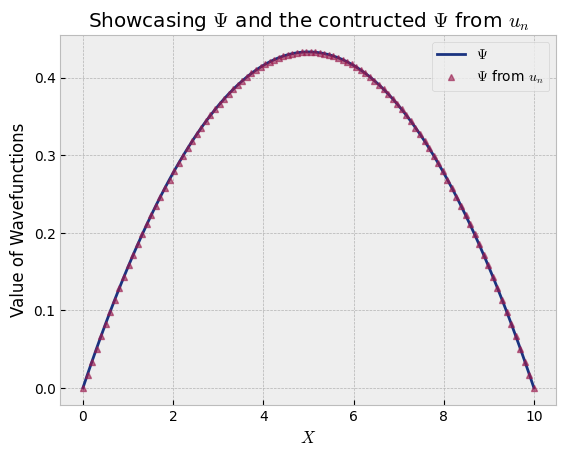

In [19]:
limitL = 10
xArray = np.linspace(0,limitL,100)
psi1NormArray = np.array([psi1Norm.subs({L:limitL,x:i}) for i in xArray])
psiConstructArray = np.array([constructedPsi.subs({L:limitL,x:i}) for i in xArray])
plt.plot(xArray,psi1NormArray,color=(0.1,0.2,0.5),label = r'$\Psi$')
plt.plot(xArray,psiConstructArray,marker='^',markersize=5,linestyle='',color=(0.6,0.1,0.3),alpha=0.6,label=r'$\Psi$ from $u_n$')
plt.xlabel(r'$X$')
plt.title(r'Showcasing $\Psi$ and the contructed $\Psi$ from $u_n$')
plt.ylabel('Value of Wavefunctions')
plt.legend()
plt.show()
#As it can be seen u_n truly are a correct basis as we managed to contruct Psi, even with only 10 points
#to a highly satisfactory degreee of accuracy

In [20]:
#Ex 3. # I m gonna set L=1 this time as the calculations become cumbersome
psi2 = N*x*(1-x)*sm.exp(-x)
integral1 = sm.integrate(psi2**2,(x,0,1)) #The integral inside the well
NSolution1 = solve(sm.Eq(integral1,1),N)[0] #Finding N such that psi1*psi1 = 1. We are keeping the positive solution
psi2Norm = sm.simplify(psi2.subs({N:NSolution1}))
psi2Norm

-2*x*(x - 1)*exp(1 - x)/sqrt(-7 + exp(2))

In [21]:
sm.simplify(sm.integrate(psi2Norm*psi2Norm,(x,0,1)))

1

In [22]:
averageEnergy1 = sm.simplify(sm.integrate(-psi2Norm*sm.diff(psi2Norm,x,x)/(2*m), (x,0,1)))
averageEnergy1

(3 - exp(2))/(2*m*(7 - exp(2)))

In [23]:
ratio = averageEnergy1/E.subs({n:1})
ratio

L**2*(3 - exp(2))/(pi**2*(7 - exp(2)))

In [24]:
ratio.subs({L:1}).evalf() #Again close to the ground state

1.14303402578337

In [25]:
coefficientArray1 = []
constructedPsi1 = 0
for element in integers:
    coeff = sm.integrate(psi.subs({n:element,L:1}).evalf()*psi2Norm,(x,0,1)).evalf()
    coefficientArray1.append(coeff)
    constructedPsi1 += coeff * psi.subs({n:element,L:1}).evalf()

In [26]:
coefficientArray1 # This time all n contribute to the construction of the function

[0.981065335104175,
 0.183166370799283,
 0.0558371967480464,
 0.0243395107300752,
 0.0124795248078746,
 0.00729466064749309,
 0.00459088867642793,
 0.00308980474804236,
 0.00216842047715875,
 0.00158492244569556]

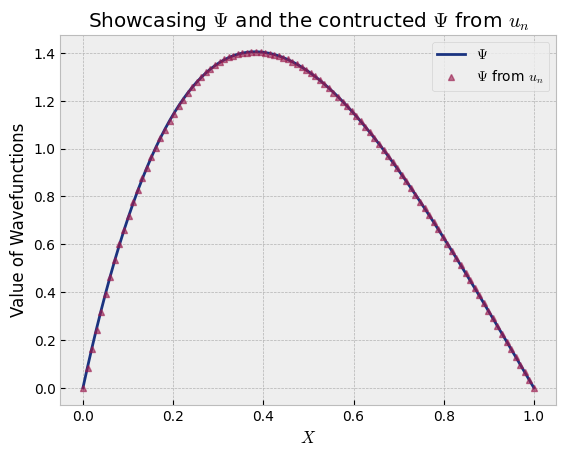

In [27]:
limitL = 1
xArray = np.linspace(0,limitL,100)
psi2NormArray = np.array([psi2Norm.subs({x:i}) for i in xArray])
psiConstructArray1 = np.array([constructedPsi1.subs({x:i}) for i in xArray])
plt.plot(xArray,psi2NormArray,color=(0.1,0.2,0.5),label = r'$\Psi$')
plt.plot(xArray,psiConstructArray1,marker='^',markersize=5,linestyle='',color=(0.6,0.1,0.3),alpha=0.6,label=r'$\Psi$ from $u_n$')
plt.xlabel(r'$X$')
plt.title(r'Showcasing $\Psi$ and the contructed $\Psi$ from $u_n$')
plt.ylabel('Value of Wavefunctions')
plt.legend()
plt.show()

In [28]:
#Ex 4.
totalPsi = N*(psi.subs({n:1})+psi.subs({n:2}))
integralTotal = sm.integrate(totalPsi**2,(x,0,L)) #The integral inside the well
NSolutionTotal = solve(sm.Eq(integralTotal,1),N)[0] #Finding N such that psi1*psi1 = 1. We are keeping the positive solution
totalPsiNorm = sm.simplify(totalPsi.subs({N:NSolutionTotal}))
totalPsiNorm

(sin(pi*x/L) + sin(2*pi*x/L))/sqrt(L)

In [29]:
#Lets again make a check
value = sm.integrate(totalPsiNorm*totalPsiNorm,(x,0,L))
value # We succefully found N.

1

In [30]:
#We need to propagate the stationary psi though time. Thus we do:
t = sm.Symbol('t',real=True)
timeEvolutionPsi = NSolutionTotal*(psi.subs({n:1}) * sm.exp(-sm.I*E.subs({n:1})*t) + psi.subs({n:2})*sm.exp(-sm.I*E.subs({n:2})*t))
timeEvolutionPsi

sqrt(2)*(sqrt(2)*exp(-2*I*pi**2*t/(L**2*m))*sin(2*pi*x/L)/sqrt(L) + sqrt(2)*exp(-I*pi**2*t/(2*L**2*m))*sin(pi*x/L)/sqrt(L))/2

In [31]:
#The probability in time and space is going to take the form:
rho = (timeEvolutionPsi*sm.conjugate(timeEvolutionPsi)).expand(complex = True).simplify()
rho

(-4*sin(pi*x/L)**4 + 5*sin(pi*x/L)**2 + cos(pi*x/L)*cos(3*pi**2*t/(2*L**2*m)) - cos(3*pi*x/L)*cos(3*pi**2*t/(2*L**2*m)))/L

In [32]:
#Average x and p, with time evolution
averageX = sm.integrate(rho*x,(x,0,L))
averageP = sm.integrate(-sm.I*sm.diff(timeEvolutionPsi,x)*sm.conjugate(timeEvolutionPsi),(x,0,L))

In [33]:
sm.simplify(averageX)

-16*L*cos(3*pi**2*t/(2*L**2*m))/(9*pi**2) + L/2

In [34]:
sm.simplify(averageP)

8*sin(3*pi**2*t/(2*L**2*m))/(3*L)

In [35]:
#Our results agree with what we expected